[*********************100%***********************]  1 of 1 completed
Epoch 1/50
69/69 [==============================] - 10s 20ms/step - loss: 0.0025
Epoch 2/50
69/69 [==============================] - 1s 21ms/step - loss: 5.0709e-05
Epoch 3/50
69/69 [==============================] - 2s 23ms/step - loss: 4.2571e-05
Epoch 4/50
69/69 [==============================] - 2s 23ms/step - loss: 4.2984e-05
Epoch 5/50
69/69 [==============================] - 2s 22ms/step - loss: 4.0245e-05
Epoch 6/50
69/69 [==============================] - 1s 20ms/step - loss: 4.0540e-05
Epoch 7/50
69/69 [==============================] - 1s 20ms/step - loss: 4.0540e-05
Epoch 8/50
69/69 [==============================] - 1s 20ms/step - loss: 4.0119e-05
Epoch 9/50
69/69 [==============================] - 2s 22ms/step - loss: 3.8786e-05
Epoch 10/50
69/69 [==============================] - 2s 23ms/step - loss: 3.9919e-05
Epoch 11/50
69/69 [==============================] - 1s 20ms/step - loss: 4.0365e-05
Epoch 12

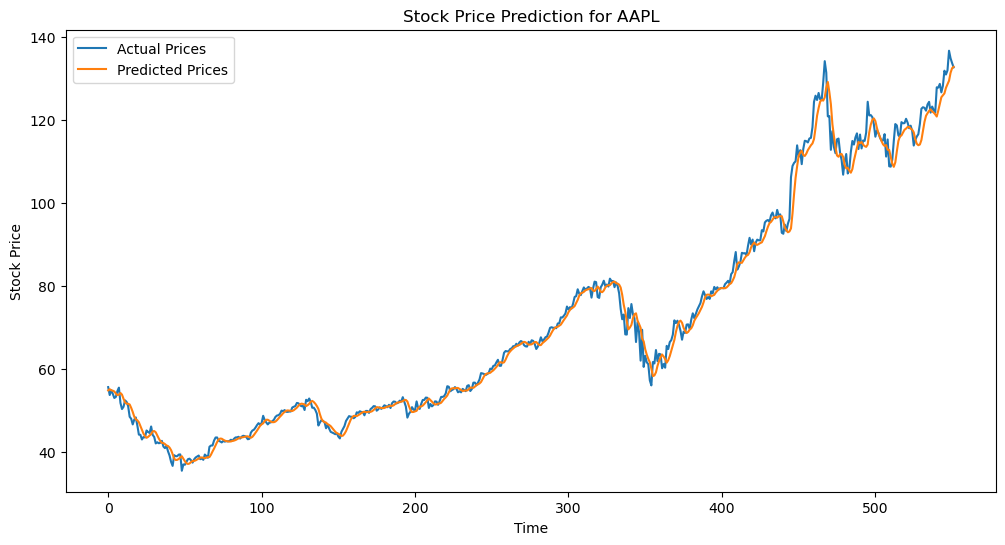

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2021-01-01"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

stock_prices = stock_data['Close'].values

scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices.reshape(-1, 1))

sequence_length = 10 
X = []
y = []
for i in range(sequence_length, len(stock_prices_scaled)):
    X.append(stock_prices_scaled[i - sequence_length:i, 0])
    y.append(stock_prices_scaled[i, 0])
X, y = np.array(X), np.array(y)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

predicted_prices_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

plt.figure(figsize=(12, 6))
plt.plot(stock_prices[train_size + sequence_length:], label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()